In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sys
import yaml
with open('../env_vars.yml', 'r') as file:
        config = yaml.safe_load(file)

# custom imports
sys.path.append(config['project_directory'])

# load data

## load data with available packaging categories

In [ ]:
df_ml = pd.read_csv(f"{config['data_directory']}/output/df_ml.csv", sep='\t')
df_ml['packaging_category'] = df_ml['packaging_category'].astype('object')
df_ml['Group'] = 'assigned'

In [65]:
df_ml.head()

,material_number,material_number_text,brand,product_area,core_segment,component,component_text,manufactoring_location,characteristic_value,material_weight,packaging_code,packaging_category,Group
0,75116293,Counter Display,BOT,PA5,Metal Grinding,6035765C21,Corrugated carton,Distribution Center,CORRUGATED,85.00,PCode_304109,Countertop display,assigned
1,75116293,Counter Display,BOT,PA5,Metal Grinding,6035940565,Label SB,Distribution Center,WOOD FREE,0.54,PCode_440854,Countertop display,assigned
2,75116293,Counter Display,BOT,PA5,Metal Grinding,6035822768,Tight -Pack label RB - 1ER,Distribution Center,MCB/GT2,22.90,PCode_834649,Countertop display,assigned
3,75116293,Counter Display,BOT,PA5,Metal Grinding,6035822768,Tight -Pack label RB - 1ER,Distribution Center,MCB/GT2,22.90,PCode_834649,Countertop display,assigned
4,75116293,Counter Display,BOT,PA5,Metal Grinding,6035765P54,Corrugated carton,Distribution Center,CORRUGATED,85.00,PCode_304109,Countertop display,assigned


In [66]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82977 entries, 0 to 82976
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   material_number         82977 non-null  int64  
 1   material_number_text    82977 non-null  object 
 2   brand                   82977 non-null  object 
 3   product_area            82977 non-null  object 
 4   core_segment            82977 non-null  object 
 5   component               82977 non-null  object 
 6   component_text          82977 non-null  object 
 7   manufactoring_location  82977 non-null  object 
 8   characteristic_value    82977 non-null  object 
 9   material_weight         75913 non-null  float64
 10  packaging_code          82977 non-null  object 
 11  packaging_category      82977 non-null  object 
 12  Group                   82977 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 8.2+ MB


## load data with unavailable packaging categories

In [ ]:
df_inf = pd.read_csv(f"{config['data_directory']}/output/df_inf.csv", sep='\t')
df_inf['packaging_category'] = df_inf['packaging_category'].astype('object')
df_inf['Group'] = 'unassigned'

In [68]:
df_inf.head()

,material_number,material_number_text,brand,product_area,core_segment,component,component_text,manufactoring_location,characteristic_value,material_weight,packaging_code,packaging_category,Group
0,77095609,GPO MOLTONS.175,BOT,PA4,Coated Abr/Polishing,6035738186,Corrugated carton,Buyout(all entities),WELLKARTON 332,NaN,PCode_304109,Unassigned,unassigned
1,77095609,GPO MOLTONS.175,BOT,PA4,Coated Abr/Polishing,6035940770,Adhesive Label,Buyout(all entities),WOOD FREE,0.35,PCode_451168,Unassigned,unassigned
2,77095609,GPO MOLTONS.175,BOT,PA4,Coated Abr/Polishing,6035910344,Label MP,Buyout(all entities),PE,0.27,PCode_440854,Unassigned,unassigned
3,53683705,9913364,VMT,PA5,Metal Drill Bits,1609471012,Insert P63152B 12X6 CB,Lct (Lincolnton),PAPER/CARDBOARD,NaN,PCode_574213,Unassigned,unassigned
4,59950025,565,PRL,PA5,Metal Drill Bits,1609443831,Corrugated carton #565,Buyout(all entities),CORRUGATED,104.44,PCode_304109,Unassigned,unassigned


In [69]:
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   material_number         7058 non-null   int64  
 1   material_number_text    7058 non-null   object 
 2   brand                   7058 non-null   object 
 3   product_area            7058 non-null   object 
 4   core_segment            7058 non-null   object 
 5   component               7058 non-null   object 
 6   component_text          7058 non-null   object 
 7   manufactoring_location  7058 non-null   object 
 8   characteristic_value    7058 non-null   object 
 9   material_weight         6632 non-null   float64
 10  packaging_code          7058 non-null   object 
 11  packaging_category      7058 non-null   object 
 12  Group                   7058 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 717.0+ KB


## concatenate data

In [70]:
frames = [df_ml, df_inf]
df_full = pd.concat(frames).reset_index(drop=True)

In [71]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90035 entries, 0 to 90034
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   material_number         90035 non-null  int64  
 1   material_number_text    90035 non-null  object 
 2   brand                   90035 non-null  object 
 3   product_area            90035 non-null  object 
 4   core_segment            90035 non-null  object 
 5   component               90035 non-null  object 
 6   component_text          90035 non-null  object 
 7   manufactoring_location  90035 non-null  object 
 8   characteristic_value    90035 non-null  object 
 9   material_weight         82545 non-null  float64
 10  packaging_code          90035 non-null  object 
 11  packaging_category      90035 non-null  object 
 12  Group                   90035 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 8.9+ MB


In [72]:
df_full['Group'].value_counts()

Group
assigned      82977
unassigned     7058
Name: count, dtype: int64

# Distribution analysis - overview

In [73]:
list(df_full.select_dtypes(include=np.number).columns)

['material_number', 'material_weight']

In [ ]:
sns.pairplot(
    data=df_full[list(df_full.select_dtypes(include=np.number).columns) + ['Group']],
    # aspect=.85,
    hue='Group'
)

# Distribution analysis - individual variables

In [14]:
df_full.columns

Index(['material_number', 'material_number_text', 'brand', 'product_area',
       'core_segment', 'component', 'component_text', 'manufactoring_location',
       'characteristic_value', 'material_weight', 'packaging_code',
       'packaging_category', 'Group'],
      dtype='object')

## 'material_weight'

In [ ]:
# observe
print(df_full['material_weight'].isin(['-', np.nan]).value_counts())
print(df_full['material_weight'].isna().value_counts())
null_values = df_full['material_weight'].loc[df_full['material_weight'].isnull()]
print(f"Null values for 'material_weight': {null_values.iloc[0]}")

Text(0.5, 1.0, 'Boxplot')

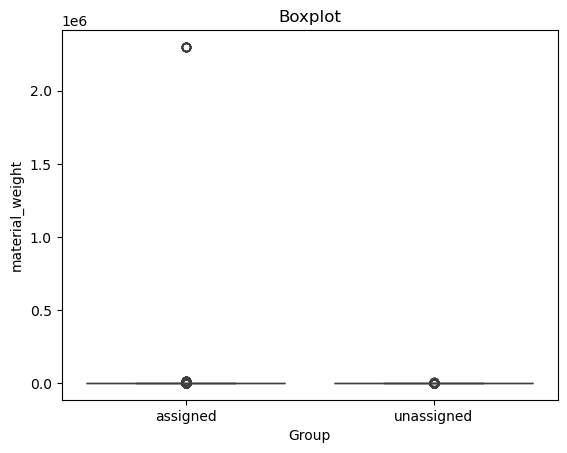

In [15]:
sns.boxplot(data=df_full, x='Group', y='material_weight')
plt.title("Boxplot")

In [16]:
df_full.material_weight.quantile([.1, .5, .9])

0.1      0.31
0.5      5.00
0.9    238.74
Name: material_weight, dtype: float64

Text(0.5, 1.0, 'Boxplot')

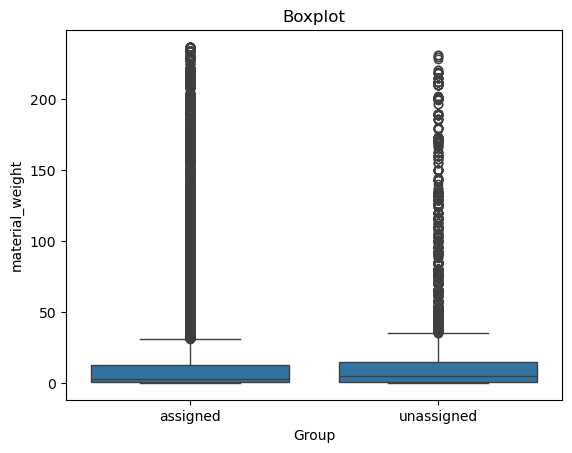

In [17]:
sns.boxplot(data=df_full.loc[df_full.material_weight <= 238], x='Group', y='material_weight')
plt.title("Boxplot")

Text(0.5, 1.0, 'Histogram')

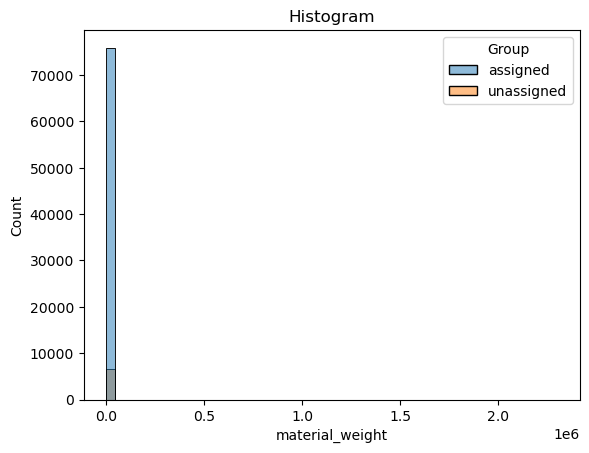

In [18]:
sns.histplot(data=df_full, x='material_weight', hue='Group', bins=50)
plt.title("Histogram")

Text(0.5, 1.0, 'Density Histogram')

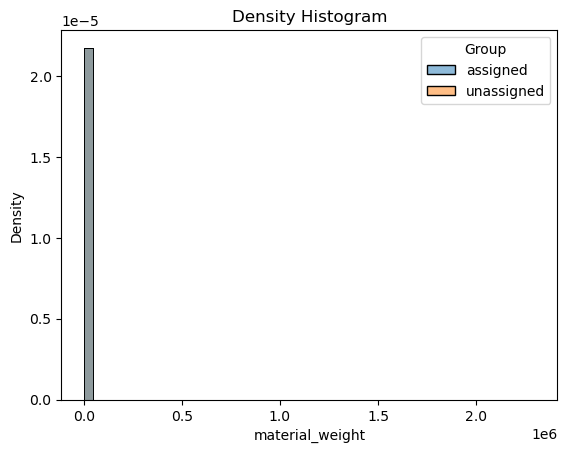

In [19]:
sns.histplot(data=df_full, x='material_weight', hue='Group', bins=50, stat='density', common_norm=False)
plt.title("Density Histogram")

Text(0.5, 1.0, 'Density Histogram')

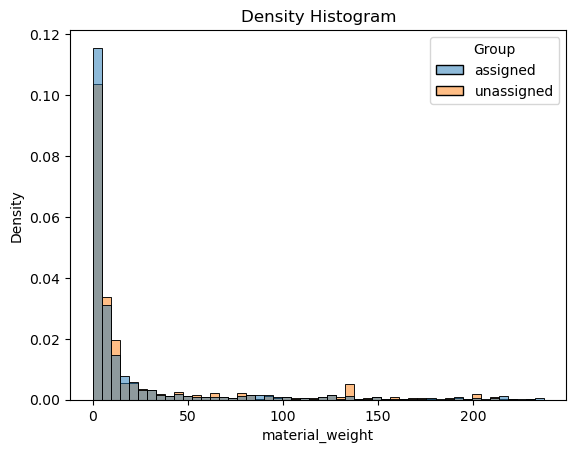

In [20]:
sns.histplot(data=df_full.loc[df_full.material_weight <= 238], x='material_weight', hue='Group', bins=50, stat='density', common_norm=False)
plt.title("Density Histogram")

Text(0.5, 1.0, 'Kernel Density Function')

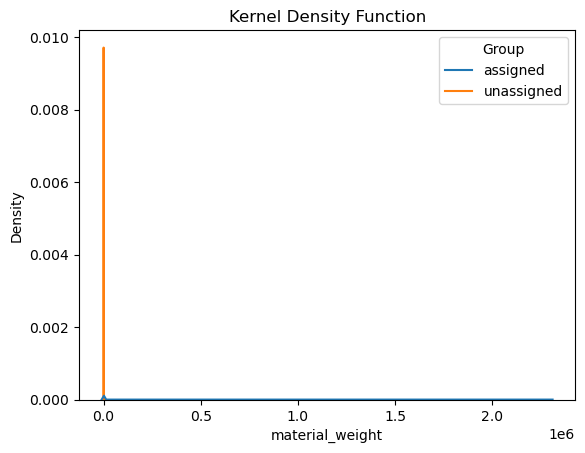

In [21]:
sns.kdeplot(data=df_full, x='material_weight', hue='Group', common_norm=False)
plt.title("Kernel Density Function")

Text(0.5, 1.0, 'Kernel Density Function')

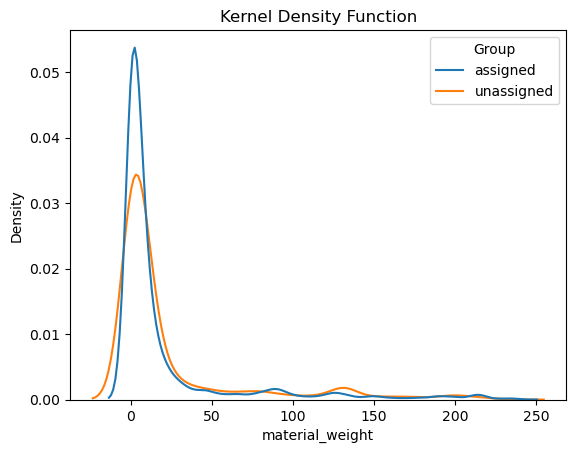

In [22]:
sns.kdeplot(data=df_full.loc[df_full.material_weight <= 238], x='material_weight', hue='Group', common_norm=False)
plt.title("Kernel Density Function")

Text(0.5, 1.0, 'Cumulative distribution function')

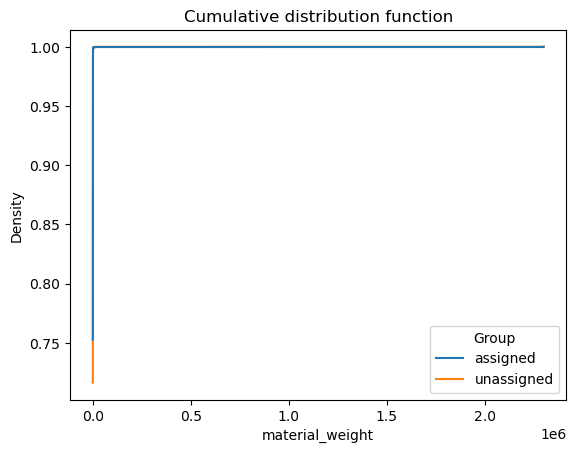

In [23]:
sns.histplot(data=df_full, x='material_weight', hue='Group', bins=len(df_full), stat="density",
             element="step", fill=False, cumulative=True, common_norm=False)
plt.title("Cumulative distribution function")

Text(0.5, 1.0, 'Cumulative distribution function')

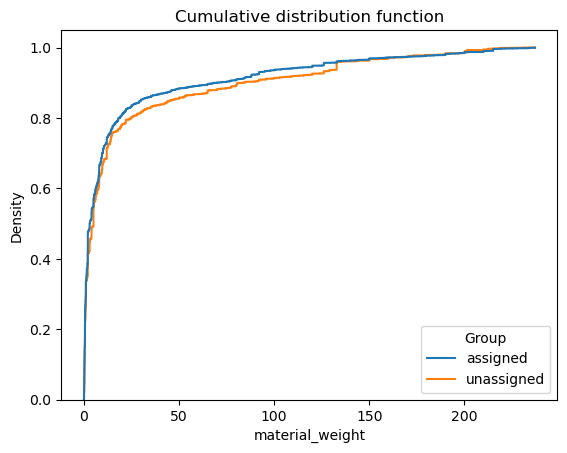

In [24]:
sns.histplot(data=df_full.loc[df_full.material_weight <= 238], x='material_weight', hue='Group', bins=len(df_full.loc[df_full.material_weight <= 238]), stat="density",
             element="step", fill=False, cumulative=True, common_norm=False)
plt.title("Cumulative distribution function")

In [25]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(
    df_full.material_weight.loc[df_full.Group == 'assigned'].dropna(),
    df_full.material_weight.loc[df_full.Group == 'unassigned'].dropna(),
)
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann–Whitney U Test: statistic=239938087.5000, p-value=0.0000


In [26]:
from scipy.stats import ks_2samp
ks_2samp(
    df_full.material_weight.loc[df_full.Group == 'assigned'].dropna(),
    df_full.material_weight.loc[df_full.Group == 'unassigned'].dropna(),
)

KstestResult(statistic=0.06167587771138622, pvalue=1.3046471365351699e-20, statistic_location=2.6, statistic_sign=1)

## 'brand'

In [27]:
df_full['brand'].nunique()

13

In [28]:
df_full['brand'].loc[df_full.Group == 'unassigned'].value_counts(normalize=True)

brand
DIA    0.385662
PRL    0.273165
BOT    0.218475
WER    0.061491
-      0.025361
PRB    0.015302
AVT    0.010626
SIA    0.003259
NTA    0.001984
VMT    0.001417
OEM    0.001417
SKL    0.001133
FED    0.000708
Name: proportion, dtype: float64

In [29]:
df_full['brand'].loc[df_full.Group == 'assigned'].value_counts(normalize=True)

brand
BOT    0.565277
PRL    0.233691
DIA    0.097690
PRB    0.041337
WER    0.037107
SIA    0.013727
AVT    0.008243
VMT    0.001904
SKL    0.000771
NTA    0.000253
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Histogram')

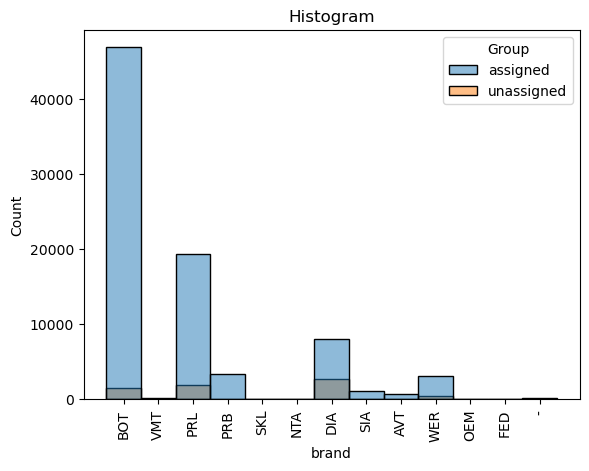

In [30]:
sns.histplot(data=df_full, x='brand', hue='Group')
plt.xticks(rotation=90)
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram')

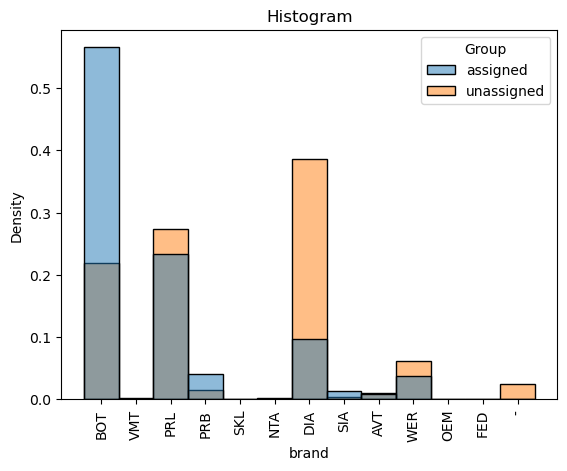

In [31]:
sns.histplot(data=df_full, x='brand', hue='Group', stat='density', common_norm=False)
plt.xticks(rotation=90)
plt.title("Histogram")

## 'product_area'

In [32]:
df_full['product_area'].nunique()

5

In [33]:
df_full['product_area'].loc[df_full.Group == 'unassigned'].value_counts().sort_index()

product_area
PA1    3034
PA2    1853
PA3      42
PA4     409
PA5    1720
Name: count, dtype: int64

In [34]:
df_full['product_area'].loc[df_full.Group == 'assigned'].value_counts().sort_index()

product_area
PA1    27595
PA2    27379
PA3     3809
PA4    10004
PA5    14190
Name: count, dtype: int64

Text(0.5, 1.0, 'Histogram')

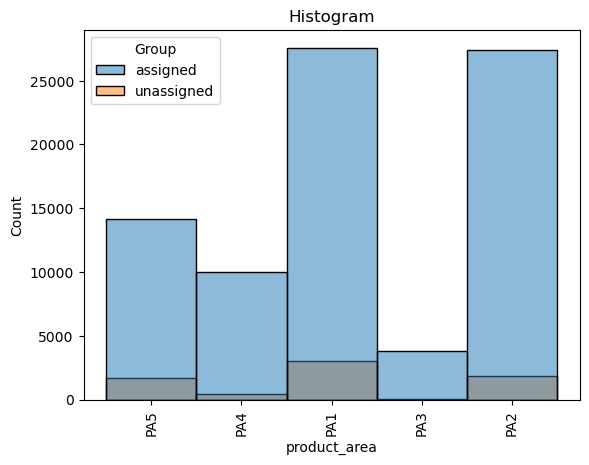

In [35]:
sns.histplot(data=df_full, x='product_area', hue='Group')
plt.xticks(rotation=90)
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram')

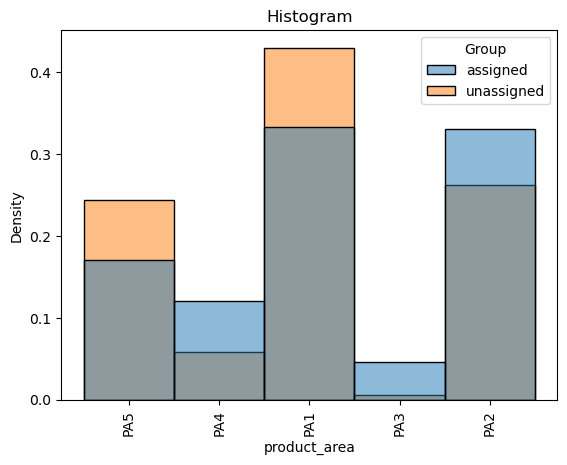

In [36]:
sns.histplot(data=df_full, x='product_area', hue='Group', stat='density', common_norm=False)
plt.xticks(rotation=90)
plt.title("Histogram")

## 'core_segment'

In [37]:
df_full['core_segment'].nunique()

23

In [38]:
df_full['core_segment'].loc[df_full.Group == 'unassigned'].value_counts().sort_index()

core_segment
-                        179
Bonded Industrial          3
Chisels                  268
Circular Saw Blades       21
Coated Abr/Polishing     393
Components                 6
DiamondDiscs/CoreBit     323
Foam Abrasives            12
HammerDrillingsmall     1693
Hammerdr.large/other     413
Holesaws                  55
Impact+Rot.Drill Bit     237
Jig Saw Blades           106
Metal Drill Bits         251
Metal Grinding           236
Non Woven Abrasives        1
Recip Saw Blades         945
Routing                   15
Screw Driving & Sets     926
Starlock                 747
System AC+Others          29
Wood Drill Bits          199
Name: count, dtype: int64

In [39]:
df_full['core_segment'].loc[df_full.Group == 'assigned'].value_counts().sort_index()

core_segment
Bonded Industrial           2
Chisels                  1250
Circular Saw Blades      2699
Coated Abr/Polishing     9767
Components                 89
DiamondDiscs/CoreBit     1807
Foam Abrasives            186
HammerDrillingsmall     14351
Hammerdr.large/other     5187
Holesaws                 5242
Impact+Rot.Drill Bit     4993
Indust.CuttingTools        11
Jig Saw Blades           8159
Metal Drill Bits         5357
Metal Grinding           1325
Non Woven Abrasives        49
Recip Saw Blades         7629
Routing                  1017
Screw Driving & Sets     3016
Starlock                 6349
System AC+Others         1809
Wood Drill Bits          2683
Name: count, dtype: int64

Text(0.5, 1.0, 'Histogram')

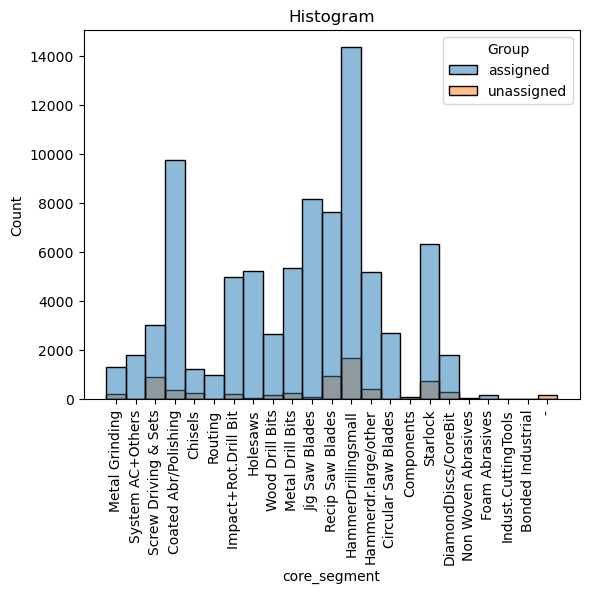

In [40]:
sns.histplot(data=df_full, x='core_segment', hue='Group')
plt.xticks(rotation=90)
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram')

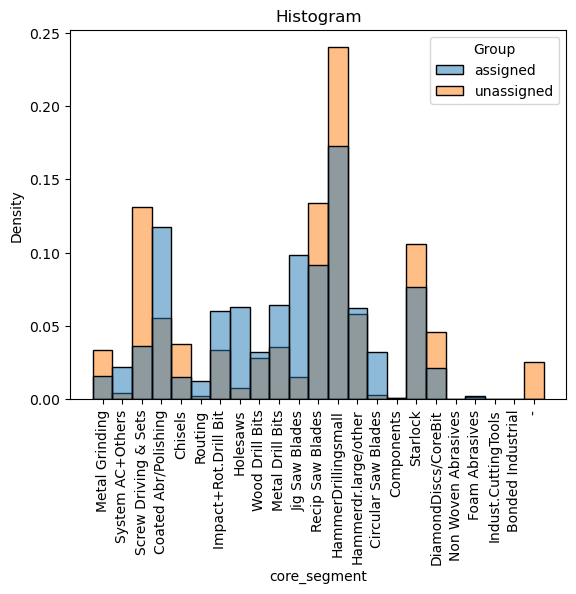

In [41]:
sns.histplot(data=df_full, x='core_segment', hue='Group', stat='density', common_norm=False)
plt.xticks(rotation=90)
plt.title("Histogram")

## 'component'

In [42]:
df_full['component'].nunique()

17834

In [43]:
df_full['component'].loc[df_full.Group == 'unassigned'].value_counts()

component
6035940565    406
2610042099    234
1609432609    184
6035574007    133
1609428746    125
             ... 
2610066771      1
2610066811      1
2610066742      1
2610066717      1
2610067062      1
Name: count, Length: 1907, dtype: int64

In [44]:
df_full['component'].loc[df_full.Group == 'assigned'].value_counts()

component
6035940565    4413
6801017003    3535
F00Y203268    1131
6035911790    1033
6035765C57    1008
              ... 
60359106DG       1
60359106DD       1
60359106DB       1
60359106DA       1
6035911R60       1
Name: count, Length: 16551, dtype: int64

In [45]:
# sns.histplot(data=df_full, x='component', hue='Group')
# plt.xticks(rotation=90)
# plt.title("Histogram")

In [46]:
# sns.histplot(data=df_full, x='component', hue='Group', stat='density', common_norm=False)
# plt.xticks(rotation=90)
# plt.title("Histogram")

## 'manufactoring_location'

In [47]:
df_full['manufactoring_location'].nunique()

24

In [48]:
df_full['manufactoring_location'].loc[df_full.Group == 'unassigned'].value_counts()

manufactoring_location
Lct (Lincolnton)        1956
Buyout(all entities)    1863
NiP (St. Niklaus)       1269
Krk (ECF Krsko)         1050
HzP3 (Hangzhou AC)       439
BrmP (Brembate)          263
-                        179
Gzh (siaCN Guangzh.)      30
McP (Miskolc)              8
PgP2 (Penang)              1
Name: count, dtype: int64

In [49]:
df_full['manufactoring_location'].loc[df_full.Group == 'assigned'].value_counts()

manufactoring_location
Krk (ECF Krsko)         23795
NiP (St. Niklaus)       20672
HzP3 (Hangzhou AC)      16522
Buyout(all entities)    12469
Lct (Lincolnton)         7834
BrmP (Brembate)          1166
Gzh (siaCN Guangzh.)      201
UdiP (Udine)              132
Slg (siaDE Solingen)       41
Gln (sia Poland Gole       36
Distribution Center        22
MtP (Murrhardt)            19
HzP1(Hangzhou Tools)       14
SjP (sia Sao Jose)          8
MexP (Mexicali)             8
Gtl (sia Greetland)         7
LeP (Leinfelden)            6
SeP (Sebnitz)               5
FraP (sia Frauenf.)         5
Alf (sia Alfreton)          5
CaP (Campinas)              4
PgP2 (Penang)               4
McP (Miskolc)               2
Name: count, dtype: int64

Text(0.5, 1.0, 'Histogram')

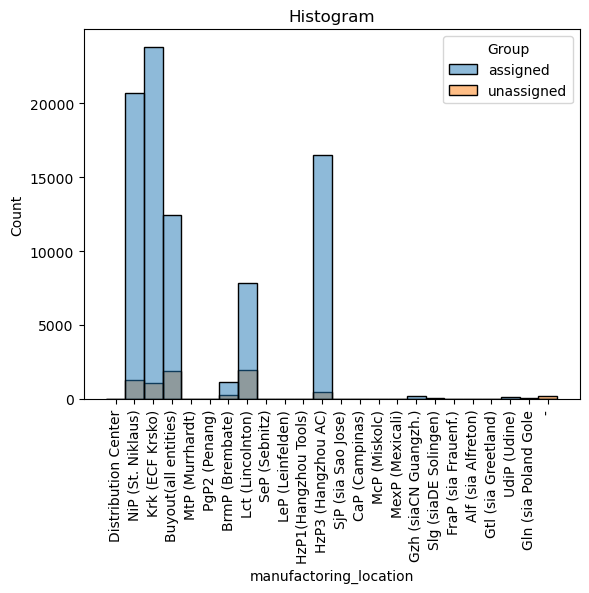

In [50]:
sns.histplot(data=df_full, x='manufactoring_location', hue='Group')
plt.xticks(rotation=90)
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram')

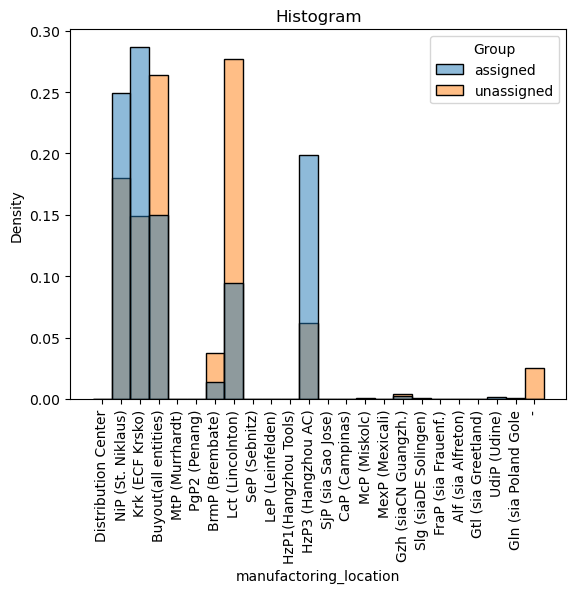

In [51]:
sns.histplot(data=df_full, x='manufactoring_location', hue='Group', stat='density', common_norm=False)
plt.xticks(rotation=90)
plt.title("Histogram")

## characteristic_value

In [52]:
df_full.columns

Index(['material_number', 'material_number_text', 'brand', 'product_area',
       'core_segment', 'component', 'component_text', 'manufactoring_location',
       'characteristic_value', 'material_weight', 'packaging_code',
       'packaging_category', 'Group'],
      dtype='object')

In [53]:
df_full['characteristic_value'].nunique()

523

In [54]:
df_full['characteristic_value'].loc[df_full.Group == 'unassigned'].value_counts()

characteristic_value
CORRUGATED                        1335
PAPER                              623
WOOD FREE                          560
PAPER/CARDBOARD                    503
PVC                                392
                                  ... 
IBIS/GT2                             1
CELLO TRANSFERPAPIER SELBSTKLE       1
IBIS                                 1
UPM TS-RP5X-03                       1
ARTPAPER 200G/M2                     1
Name: count, Length: 156, dtype: int64

In [55]:
df_full['characteristic_value'].loc[df_full.Group == 'assigned'].value_counts()

characteristic_value
CORRUGATED                  16575
WOOD FREE                    8674
PAPER                        7307
PP                           4934
PAPER/CARDBOARD              3276
                            ...  
MICRO-WELLPAPPE 432             1
WELLPAPPE 532                   1
PP90 TOP CLEAR                  1
IGEPA SPEZIAL 250 G/M149        1
COATED CARDBOARD                1
Name: count, Length: 510, dtype: int64

In [56]:
# sns.histplot(data=df_full, x='characteristic_value', hue='Group')
# plt.xticks(rotation=90)
# plt.title("Histogram")

In [57]:
# sns.histplot(data=df_full, x='characteristic_value', hue='Group', stat='density', common_norm=False)
# plt.xticks(rotation=90)
# plt.title("Histogram")

## 'packaging category'

In [57]:
df_full['packaging_code'].nunique()

132

In [ ]:
df_full['packaging_category'].value_counts(dropna=False)

In [58]:
df_full['packaging_code'].loc[df_full.Group == 'unassigned'].value_counts()

packaging_code
PCode_440854    1906
PCode_304109    1395
PCode_683060     478
PCode_233229     337
PCode_252685     259
                ... 
PCode_592560       1
PCode_232789       1
PCode_833001       1
PCode_259323       1
PCode_401997       1
Name: count, Length: 70, dtype: int64

In [59]:
df_full['packaging_code'].loc[df_full.Group == 'assigned'].value_counts()

packaging_code
PCode_440854    20752
PCode_304109    13671
PCode_657179     4450
PCode_371365     3820
PCode_683060     3271
                ...  
PCode_995549        1
PCode_632473        1
PCode_890865        1
PCode_795530        1
PCode_547072        1
Name: count, Length: 132, dtype: int64

In [ ]:
print(df_full['packaging_category'].isin(['-', np.nan]))
df_full['packaging_category'].loc[df_full['packaging_category'].isin(['-', np.nan])].value_counts()

In [ ]:
print(df_full['packaging_category'].isin(['No Packaging']))
df_full['packaging_category'].loc[df_full['packaging_category'].isin(['No Packaging'])].value_counts()

Text(0.5, 1.0, 'Histogram')

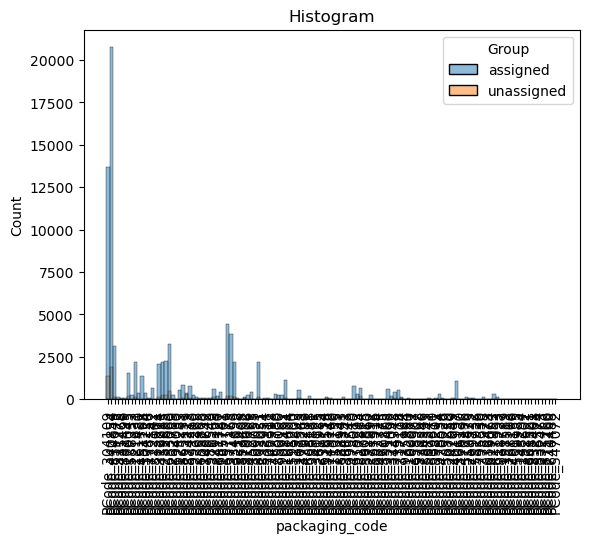

In [60]:
sns.histplot(data=df_full, x='packaging_code', hue='Group')
plt.xticks(rotation=90)
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram')

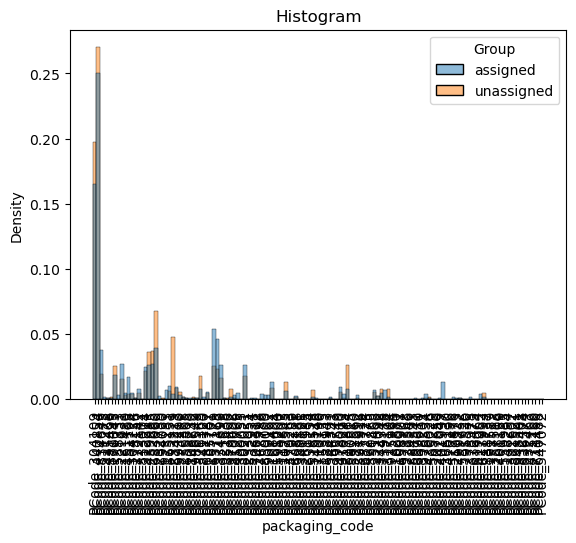

In [61]:
sns.histplot(data=df_full, x='packaging_code', hue='Group', stat='density', common_norm=False)
plt.xticks(rotation=90)
plt.title("Histogram")